# Пример построения приложения для интерпретации теста на падение давления (drawdown test)

Материалы курсов "Исследования скважин и пластов" и "Гидродинамические исследования скважин" в РГУ нефти и газа имени И.М.Губкина.

Хабибуллин Ринат 2021 г.

версия 0.1 от 21.10.2021

---


In [1]:
# в google colab это надо выполнить, чтобы дальше все хорошо сработало
!pip install jupyter-dash

# без колаба не обязательно, если библиотека у вас уже установлена

In [9]:
import plotly.express as px
import plotly.graph_objects as go

from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

import pandas as pd
import numpy as np
import scipy.special as sc

from welltest.functions import *

In [3]:
# Решение линейного стока уравнения фильтрации
def pd_ei(td, rd=1):
  return -1/2*sc.expi(-rd**2 / 4 / td)

def p_ei_atma(t_hr):
    """
    расчет забойного давления скважины
    """
    td = td_from_t(t_hr)
    return p_from_pd_atma(pd_ei(td))

In [4]:
path = 'C:\\rnt\\welltest_data\\'
file_rate = "rates.txt"
file_pressure = "pressure.txt"

dfpres = pd.read_csv(path+file_pressure, header=1, sep=' ', skipinitialspace= True)
dfpres.columns = ['time', 'pressure', 'n']
dfpres = dfpres.drop('n',1)

In [5]:
df = pd.DataFrame(columns = ['t', 'p'])
df.t = [1,10]
df.p = [250, 230]

In [25]:
h=10
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo test 3"),
    dcc.Graph(id='graph'),
    html.Label(id = 'label', 
               children= [
        "h = {}".format(h),
        dcc.Slider(
            id='my-slider',
            min=1,
            max=100,
            step=1,
            value=10,
            )
    ]),
    
    dcc.Checklist(
        id='my-check',
        options=[
            {'label': 'semi log', 'value': 'semilog'}
        ],
            value=['semi log', 'semilog']
        )
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    Input("my-slider", "value"),
    Input("my-check", "value"),
    
)
def update_figure(m, log):
    h=m
    fig = go.Figure()
    fig.add_trace(
        go.Line(x=dfpres.time, y=dfpres.pressure)
    )
    fig.add_trace(
        go.Line(x=df.t, y=df.p-m)
    )
    fig.update_layout(xaxis_type="log")
    return fig

# Run app and display result inline in the notebook
app.run_server(mode='inline')

## Загрузка данных исследований

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
path = 'C:\\rnt\\welltest_data\\'
file_rate = "rates.txt"
file_pressure = "pressure.txt"

In [7]:
dfpres = pd.read_csv(path+file_pressure, header=1, sep=' ', skipinitialspace= True)
dfpres.columns = ['time', 'pressure', 'n']
dfpres = dfpres.drop('n',1)

<AxesSubplot:>

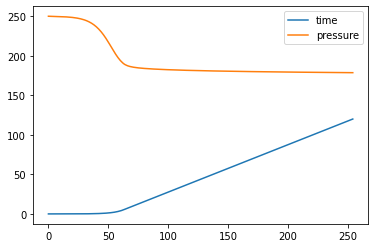

In [8]:
dfpres.plot()

In [9]:
dfpres.pressure

0      250.000
1      249.952
2      249.904
3      249.856
4      249.808
        ...   
250    178.672
251    178.660
252    178.647
253    178.635
254    178.623
Name: pressure, Length: 255, dtype: float64

In [ ]:
S=10
k=18
Pi=270
mu = 2
t = np.array(dfpres.time)
td = td_from_t(t, k_mD=k, mu_cP=mu)

plt.plot(dfpres.time, dfpres.pressure)
plt.plot(dfpres.time, p_from_pd_atma( pd_ei(1, td)+S, k_mD=k, pi_atma=Pi, mu_cP=mu)) 
plt.xscale('log')
plt.show()

In [ ]:
t = np.array(dfpres.time)
p = pd_ei(1,t)